In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display, HTML
from humanfriendly import format_timespan, format_number, format_length
import folium
import gpxpy
import gzip
import io
import zlib
import fitparse

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('activities.csv')

In [4]:
df.head()

Activity ID             Activity Date   
0    178320385  Aug 10, 2014, 4:36:48 PM  \
1    178364464  Aug 10, 2014, 5:07:20 PM   
2    178374420  Aug 10, 2014, 1:44:06 PM   
3    178377613   Aug 9, 2014, 9:20:19 PM   
4    178378375   Aug 9, 2014, 7:04:29 PM   

                                       Activity Name Activity Type   
0                                       Evening Walk          Walk  \
1                                       Evening Ride          Ride   
2  08/10/2014 Klaipėda, Klaipedos Apskritis, Lith...          Ride   
3  08/10/2014 Klaipėda, Klaipedos Apskritis, Lith...          Ride   
4  08/09/2014 Klaipėda, Klaipedos Apskritis, Lith...          Ride   

  Activity Description  Elapsed Time  Distance  Max Heart Rate   
0                  NaN            29      0.14             NaN  \
1                  NaN          2792     13.70             NaN   
2                  NaN          4257     18.65             NaN   
3                  NaN          4070     21.79             NaN   
4                  NaN          7885     20.59             NaN   

   Relative Effort Commute  Activity Private Note Activity Gear   
0              NaN   False                    NaN           NaN  \
1              NaN   False                    NaN           NaN   
2              NaN   False                    NaN           NaN   
3              NaN   False                    NaN           NaN   
4              NaN   False                    NaN           NaN   

                      Filename  Athlete Weight  Bike Weight  Elapsed Time.1   
0     activities/178320385.gpx           100.0          NaN            29.0  \
1     activities/178364464.gpx           100.0          NaN          2792.0   
2  activities/195797812.gpx.gz           100.0          NaN          4257.0   
3  activities/195801446.gpx.gz           100.0          NaN          4070.0   
4  activities/195802289.gpx.gz           100.0          NaN          7885.0   

   Moving Time    Distance.1  Max Speed  Average Speed  Elevation Gain   
0         29.0    145.699997       11.1            NaN        0.000000  \
1       2770.0  13702.299805       12.2            NaN       25.985701   
2       3330.0  18656.400391       10.7            NaN       29.240000   
3       3856.0  21789.599609        9.7            NaN       21.160000   
4       3670.0  20593.000000       11.4            NaN       34.433300   

   Elevation Loss  Elevation Low  Elevation High  Max Grade  Average Grade   
0             NaN           12.5       12.700000        1.4       0.000000  \
1       35.685699           -2.0       25.799999        7.6      -0.070791   
2       18.040001           -1.7       25.400000        7.5       0.060033   
3       32.259998           -1.0       30.900000       14.7      -0.050942   
4       25.533300            7.6       34.599998        3.8       0.043219   

   Average Positive Grade  Average Negative Grade  Max Cadence   
0                     NaN                     NaN          NaN  \
1                     NaN                     NaN          NaN   
2                     NaN                     NaN          NaN   
3                     NaN                     NaN          NaN   
4                     NaN                     NaN          NaN   

   Average Cadence  Max Heart Rate.1  Average Heart Rate  Max Watts   
0              NaN               NaN                 NaN        NaN  \
1              NaN               NaN                 NaN        NaN   
2              NaN               NaN                 NaN        NaN   
3              NaN               NaN                 NaN        NaN   
4              NaN               NaN                 NaN        NaN   

   Average Watts   Calories  Max Temperature  Average Temperature   
0            NaN  17.901867              NaN                  NaN  \
1            NaN        NaN              NaN                  NaN   
2            NaN        NaN              NaN                  NaN   
3            NaN        NaN 

In [5]:
df.columns

Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate',
       'Relative Effort', 'Commute', 'Activity Private Note', 'Activity Gear',
       'Filename', 'Athlete Weight', 'Bike Weight', 'Elapsed Time.1',
       'Moving Time', 'Distance.1', 'Max Speed', 'Average Speed',
       'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High',
       'Max Grade', 'Average Grade', 'Average Positive Grade',
       'Average Negative Grade', 'Max Cadence', 'Average Cadence',
       'Max Heart Rate.1', 'Average Heart Rate', 'Max Watts', 'Average Watts',
       'Calories', 'Max Temperature', 'Average Temperature',
       'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time',
       'Downhill Time', 'Other Time', 'Perceived Exertion',
       '<span class="translation_missing" title="translation missing: en-US.lib.export.portability_exporter.activities.horton_values.type">Type</span>',

Nuimti html tagai iš stulpeliu indeksų.

In [6]:
df.columns = df.columns.str.replace(r'<[^<>]*>', '', regex=True)

In [7]:
df.columns

Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate',
       'Relative Effort', 'Commute', 'Activity Private Note', 'Activity Gear',
       'Filename', 'Athlete Weight', 'Bike Weight', 'Elapsed Time.1',
       'Moving Time', 'Distance.1', 'Max Speed', 'Average Speed',
       'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High',
       'Max Grade', 'Average Grade', 'Average Positive Grade',
       'Average Negative Grade', 'Max Cadence', 'Average Cadence',
       'Max Heart Rate.1', 'Average Heart Rate', 'Max Watts', 'Average Watts',
       'Calories', 'Max Temperature', 'Average Temperature',
       'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time',
       'Downhill Time', 'Other Time', 'Perceived Exertion', 'Type',
       'Start Time', 'Weighted Average Power', 'Power Count',
       'Prefer Perceived Exertion', 'Perceived Relative Effort', 'Commute.1',
    

In [8]:
df.isna().sum()

Activity ID                        0
Activity Date                      0
Activity Name                      0
Activity Type                      0
Activity Description            3079
                                ... 
Newly Explored Distance         4050
Newly Explored Dirt Distance    4050
Sport Type                      4050
Total Steps                     4050
Media                           3527
Length: 87, dtype: int64

In [9]:
df = df.dropna(axis=1, how='all')

In [10]:
df.columns

Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate',
       'Relative Effort', 'Commute', 'Activity Gear', 'Filename',
       'Athlete Weight', 'Bike Weight', 'Elapsed Time.1', 'Moving Time',
       'Distance.1', 'Max Speed', 'Average Speed', 'Elevation Gain',
       'Elevation Loss', 'Elevation Low', 'Elevation High', 'Max Grade',
       'Average Grade', 'Max Cadence', 'Average Cadence', 'Max Heart Rate.1',
       'Average Heart Rate', 'Average Watts', 'Calories',
       'Average Temperature', 'Relative Effort.1', 'Perceived Exertion',
       'Prefer Perceived Exertion', 'Perceived Relative Effort', 'Commute.1',
       'From Upload', 'Grade Adjusted Distance', 'Weather Observation Time',
       'Weather Condition', 'Weather Temperature', 'Apparent Temperature',
       'Dewpoint', 'Humidity', 'Weather Pressure', 'Wind Speed', 'Wind Gust',
       'Wind Bearing', 'Precipitation Intensity', 'S

In [11]:
df.head()

Activity ID             Activity Date   
0    178320385  Aug 10, 2014, 4:36:48 PM  \
1    178364464  Aug 10, 2014, 5:07:20 PM   
2    178374420  Aug 10, 2014, 1:44:06 PM   
3    178377613   Aug 9, 2014, 9:20:19 PM   
4    178378375   Aug 9, 2014, 7:04:29 PM   

                                       Activity Name Activity Type   
0                                       Evening Walk          Walk  \
1                                       Evening Ride          Ride   
2  08/10/2014 Klaipėda, Klaipedos Apskritis, Lith...          Ride   
3  08/10/2014 Klaipėda, Klaipedos Apskritis, Lith...          Ride   
4  08/09/2014 Klaipėda, Klaipedos Apskritis, Lith...          Ride   

  Activity Description  Elapsed Time  Distance  Max Heart Rate   
0                  NaN            29      0.14             NaN  \
1                  NaN          2792     13.70             NaN   
2                  NaN          4257     18.65             NaN   
3                  NaN          4070     21.79             NaN   
4                  NaN          7885     20.59             NaN   

   Relative Effort Commute Activity Gear                     Filename   
0              NaN   False           NaN     activities/178320385.gpx  \
1              NaN   False           NaN     activities/178364464.gpx   
2              NaN   False           NaN  activities/195797812.gpx.gz   
3              NaN   False           NaN  activities/195801446.gpx.gz   
4              NaN   False           NaN  activities/195802289.gpx.gz   

   Athlete Weight  Bike Weight  Elapsed Time.1  Moving Time    Distance.1   
0           100.0          NaN            29.0         29.0    145.699997  \
1           100.0          NaN          2792.0       2770.0  13702.299805   
2           100.0          NaN          4257.0       3330.0  18656.400391   
3           100.0          NaN          4070.0       3856.0  21789.599609   
4           100.0          NaN          7885.0       3670.0  20593.000000   

   Max Speed  Average Speed  Elevation Gain  Elevation Loss  Elevation Low   
0       11.1            NaN        0.000000             NaN           12.5  \
1       12.2            NaN       25.985701       35.685699           -2.0   
2       10.7            NaN       29.240000       18.040001           -1.7   
3        9.7            NaN       21.160000       32.259998           -1.0   
4       11.4            NaN       34.433300       25.533300            7.6   

   Elevation High  Max Grade  Average Grade  Max Cadence  Average Cadence   
0       12.700000        1.4       0.000000          NaN              NaN  \
1       25.799999        7.6      -0.070791          NaN              NaN   
2       25.400000        7.5       0.060033          NaN              NaN   
3       30.900000       14.7      -0.050942          NaN              NaN   
4       34.599998        3.8       0.043219          NaN              NaN   

   Max Heart Rate.1  Average Heart Rate  Average Watts   Calories   
0               NaN                 NaN            NaN  17.901867  \
1               NaN                 NaN            NaN        NaN   
2               NaN                 NaN            NaN        NaN   
3               NaN                 NaN            NaN        NaN   
4               NaN                 NaN            NaN        NaN   

   Average Temperature  Relative Effort.1  Perceived Exertion   
0                  NaN                NaN                 NaN  \
1                  NaN                NaN                 NaN   
2                  NaN                NaN                 NaN   
3                  NaN                NaN                 NaN   
4                  NaN                NaN                 NaN   

   Prefer Perceived Exertion  Perceived Relative Effort  Commute.1   
0                        NaN                        NaN        0.0  \
1                        NaN                        NaN        0.0   
2                        NaN                        NaN        0.0   


In [12]:
cols = df.columns.values.tolist()

In [13]:
for k, v in enumerate(cols):
    print(k, v)

0 Activity ID
1 Activity Date
2 Activity Name
3 Activity Type
4 Activity Description
5 Elapsed Time
6 Distance
7 Max Heart Rate
8 Relative Effort
9 Commute
10 Activity Gear
11 Filename
12 Athlete Weight
13 Bike Weight
14 Elapsed Time.1
15 Moving Time
16 Distance.1
17 Max Speed
18 Average Speed
19 Elevation Gain
20 Elevation Loss
21 Elevation Low
22 Elevation High
23 Max Grade
24 Average Grade
25 Max Cadence
26 Average Cadence
27 Max Heart Rate.1
28 Average Heart Rate
29 Average Watts
30 Calories
31 Average Temperature
32 Relative Effort.1
33 Perceived Exertion
34 Prefer Perceived Exertion
35 Perceived Relative Effort
36 Commute.1
37 From Upload
38 Grade Adjusted Distance
39 Weather Observation Time
40 Weather Condition
41 Weather Temperature
42 Apparent Temperature
43 Dewpoint
44 Humidity
45 Weather Pressure
46 Wind Speed
47 Wind Gust
48 Wind Bearing
49 Precipitation Intensity
50 Sunrise Time
51 Sunset Time
52 Moon Phase
53 Bike
54 Precipitation Probability
55 Precipitation Type
56 Clo

Converting date from string to datetime 

df['activity_date'] = pd.to_datetime(df['Activity Date'], infer_datetime_format=True - meta įspėjimą)

In [14]:
# Decorated 'Average Speed', 'Max Speed', Activity Date, 'Moving Time'
df['average_speed'] = df['Average Speed'].apply(lambda x: str(round((x*60*60/1000), 2)))
df['max_speed'] = df['Max Speed'].apply(lambda x: str(round((x*60*60/1000), 2)))
df['moving_time'] = df['Moving Time'].apply(lambda x: format_timespan(x))
df['activity_date'] = pd.to_datetime(df['Activity Date'], format='mixed')
df['elevation_gain'] = df['Elevation Gain'].apply(lambda x: round(x,2))

In [15]:
df['activity_date'].head()

0   2014-08-10 16:36:48
1   2014-08-10 17:07:20
2   2014-08-10 13:44:06
3   2014-08-09 21:20:19
4   2014-08-09 19:04:29
Name: activity_date, dtype: datetime64[ns]

In [16]:
# select date range in 2022
year_act = (df['activity_date'] >= '2022-01-01') & (df['activity_date'] <= '2022-12-31')
df = df.loc[year_act]
df.head()

Activity ID            Activity Date   
3342   6463285994  Jan 2, 2022, 7:39:38 PM  \
3343   6464456622  Jan 3, 2022, 5:12:10 AM   
3344   6466969824  Jan 3, 2022, 3:34:40 PM   
3345   6469567160  Jan 4, 2022, 5:09:06 AM   
3346   6471805022  Jan 4, 2022, 3:18:52 PM   

                                          Activity Name Activity Type   
3342                      Get to da chaaaaappaaaaahhhh!          Ride  \
3343  I am running away from my responsibilities. An...          Ride   
3344  Some people have no idea what they're doing, a...          Ride   
3345  The day you stop racing, is the day you win th...          Ride   
3346                               To the winch, wench!          Ride   

                                   Activity Description  Elapsed Time   
3342  Activity name auto generated by https://www.Ba...          3692  \
3343  https://www.Bandok.com - Give your activities ...          1918   
3344  https://www.Bandok.com - Give your activities ...          3080   
3345  https://www.Bandok.com - Give your activities ...          1950   
3346  https://www.Bandok.com - Give your activities ...          2082   

      Distance  Max Heart Rate  Relative Effort Commute   
3342     20.99             NaN              NaN   False  \
3343     10.24             NaN              NaN   False   
3344     10.61             NaN              NaN   False   
3345      9.46             NaN              NaN   False   
3346     10.78             NaN              NaN   False   

                     Activity Gear                      Filename   
3342             Canyon Inflite Al  activities/6871992476.fit.gz  \
3343  Canyon Grand Canyon 6.0 2018  activities/6873256215.fit.gz   
3344  Canyon Grand Canyon 6.0 2018  activities/6875961489.fit.gz   
3345  Canyon Grand Canyon 6.0 2018  activities/6878729766.fit.gz   
3346  Canyon Grand Canyon 6.0 2018  activities/6881153023.fit.gz   

      Athlete Weight  Bike Weight  Elapsed Time.1  Moving Time    Distance.1   
3342             NaN         10.0          3692.0       3153.0  20997.990234  \
3343             NaN         10.0          1918.0       1918.0  10248.910156   
3344             NaN         10.0          3080.0       2362.0  10615.440430   
3345             NaN         10.0          1950.0       1713.0   9464.620117   
3346             NaN         10.0          2082.0       2017.0  10782.900391   

      Max Speed  Average Speed  Elevation Gain  Elevation Loss  Elevation Low   
3342  10.278028       6.659686            76.0            67.0      -4.400000  \
3343   7.964386       5.343540            31.0            22.0      50.599998   
3344   7.631673       4.494259            32.0            32.0       9.800000   
3345   9.262234       5.525172            36.0            29.0      22.000000   
3346   8.870002       5.346009            25.0            23.0       8.400000   

      Elevation High  Max Grade  Average Grade  Max Cadence  Average Cadence   
3342       33.000000   7.894453       0.060006          NaN              NaN  \
3343      147.600006   3.743648       0.078057          NaN              NaN   
3344      115.000000  14.218155      -0.039565          NaN              NaN   
3345       83.599998  23.230223       0.031697          NaN              NaN   
3346       99.199997  37.698254      -0.020403          NaN              NaN   

      Max Heart Rate.1  Average Heart Rate  Average Watts    Calories   
3342               NaN                 NaN     122.832634  431.831085  \
3343               NaN                 NaN     184.156799  390.000000   
3344               NaN                 NaN     135.194229  370.000000   
3345               NaN                 NaN     197.504089  395.000000   
3346               NaN                 NaN     177.334366  422.000000   

      Average Temperature  Relative Effort.1  Perceived Exertion   
3342                  4.0                NaN                 NaN  \
3343                  6.0                NaN                 Na

In [17]:
# number of activities
len(df)

617

In [18]:
df.groupby(['Activity Type']).size()

Activity Type
Ride    553
Walk     64
dtype: int64

In [19]:
df.groupby("Activity Type")["Distance"].sum()

Activity Type
Ride    13655.15
Walk      414.24
Name: Distance, dtype: float64

In [20]:
# Perform the groupby
activity_counts = df["Activity Type"].value_counts()

In [21]:
# Perform the groupby and sum operation
grouped = df.groupby("Activity Type")["Distance"].sum()

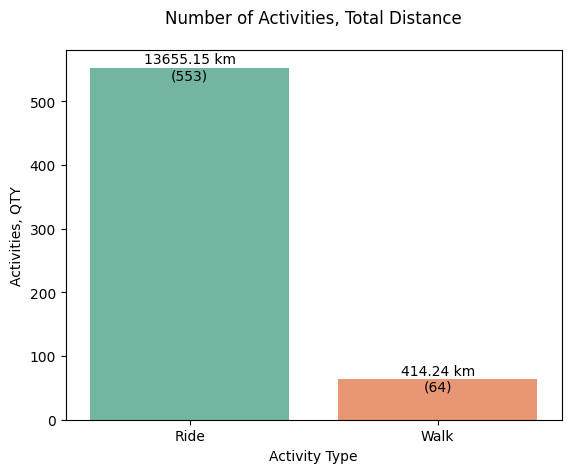

In [22]:
# activity categories

g = sns.countplot(x='Activity Type', data=df, palette="Set2")
g.set_title('Number of Activities, Total Distance', y=1.05)
g.set(ylabel='Activities, QTY')


# Merge the groupby result with the countplot data
for i, bar in enumerate(g.patches):
    g.text(
        bar.get_x() + bar.get_width() / 2,     # X position of the text
        bar.get_height() + 0,                   # Y position of the text
        # (str(grouped[i])+" km"),            # Text to be displayed (sum value)
        f'{grouped[i]} km\n({activity_counts[i]})',  # Text to be displayed (count and sum value)
        ha='center',                             # Horizontal alignment
        va='center',                             # Vertical alignment
    )

# Display the plot
plt.show()

In [23]:
df.head()

Activity ID            Activity Date   
3342   6463285994  Jan 2, 2022, 7:39:38 PM  \
3343   6464456622  Jan 3, 2022, 5:12:10 AM   
3344   6466969824  Jan 3, 2022, 3:34:40 PM   
3345   6469567160  Jan 4, 2022, 5:09:06 AM   
3346   6471805022  Jan 4, 2022, 3:18:52 PM   

                                          Activity Name Activity Type   
3342                      Get to da chaaaaappaaaaahhhh!          Ride  \
3343  I am running away from my responsibilities. An...          Ride   
3344  Some people have no idea what they're doing, a...          Ride   
3345  The day you stop racing, is the day you win th...          Ride   
3346                               To the winch, wench!          Ride   

                                   Activity Description  Elapsed Time   
3342  Activity name auto generated by https://www.Ba...          3692  \
3343  https://www.Bandok.com - Give your activities ...          1918   
3344  https://www.Bandok.com - Give your activities ...          3080   
3345  https://www.Bandok.com - Give your activities ...          1950   
3346  https://www.Bandok.com - Give your activities ...          2082   

      Distance  Max Heart Rate  Relative Effort Commute   
3342     20.99             NaN              NaN   False  \
3343     10.24             NaN              NaN   False   
3344     10.61             NaN              NaN   False   
3345      9.46             NaN              NaN   False   
3346     10.78             NaN              NaN   False   

                     Activity Gear                      Filename   
3342             Canyon Inflite Al  activities/6871992476.fit.gz  \
3343  Canyon Grand Canyon 6.0 2018  activities/6873256215.fit.gz   
3344  Canyon Grand Canyon 6.0 2018  activities/6875961489.fit.gz   
3345  Canyon Grand Canyon 6.0 2018  activities/6878729766.fit.gz   
3346  Canyon Grand Canyon 6.0 2018  activities/6881153023.fit.gz   

      Athlete Weight  Bike Weight  Elapsed Time.1  Moving Time    Distance.1   
3342             NaN         10.0          3692.0       3153.0  20997.990234  \
3343             NaN         10.0          1918.0       1918.0  10248.910156   
3344             NaN         10.0          3080.0       2362.0  10615.440430   
3345             NaN         10.0          1950.0       1713.0   9464.620117   
3346             NaN         10.0          2082.0       2017.0  10782.900391   

      Max Speed  Average Speed  Elevation Gain  Elevation Loss  Elevation Low   
3342  10.278028       6.659686            76.0            67.0      -4.400000  \
3343   7.964386       5.343540            31.0            22.0      50.599998   
3344   7.631673       4.494259            32.0            32.0       9.800000   
3345   9.262234       5.525172            36.0            29.0      22.000000   
3346   8.870002       5.346009            25.0            23.0       8.400000   

      Elevation High  Max Grade  Average Grade  Max Cadence  Average Cadence   
3342       33.000000   7.894453       0.060006          NaN              NaN  \
3343      147.600006   3.743648       0.078057          NaN              NaN   
3344      115.000000  14.218155      -0.039565          NaN              NaN   
3345       83.599998  23.230223       0.031697          NaN              NaN   
3346       99.199997  37.698254      -0.020403          NaN              NaN   

      Max Heart Rate.1  Average Heart Rate  Average Watts    Calories   
3342               NaN                 NaN     122.832634  431.831085  \
3343               NaN                 NaN     184.156799  390.000000   
3344               NaN                 NaN     135.194229  370.000000   
3345               NaN                 NaN     197.504089  395.000000   
3346               NaN                 NaN     177.334366  422.000000   

      Average Temperature  Relative Effort.1  Perceived Exertion   
3342                  4.0                NaN                 NaN  \
3343                  6.0                NaN                 Na

In [24]:
# number of active days
len(df.groupby([df['activity_date'].dt.date]))

323

In [25]:
# adding new column month 
df['activity_month'] = df['activity_date'].dt.month
df['activity_day'] = df['activity_date'].dt.day
df['activity_day_name'] = df['activity_date'].dt.day_name()

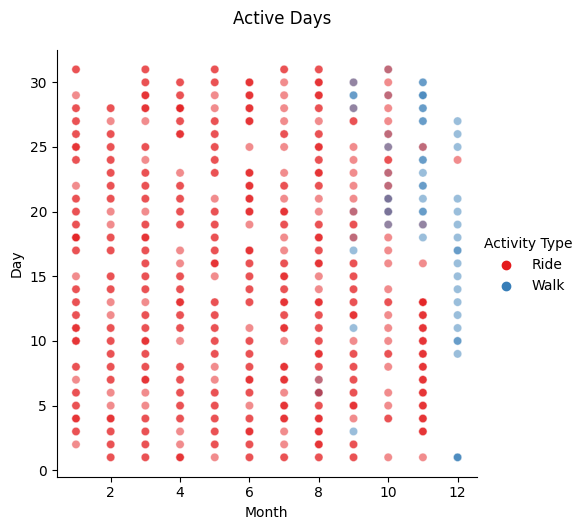

In [26]:
g = sns.relplot(x='activity_month', y='activity_day', kind='scatter',
            hue='Activity Type', alpha=.5, palette="Set1", data=df)

g.fig.suptitle('Active Days', y=1.05)

g.set(xlabel='Month', ylabel='Day')

In [27]:
df["activity_day_name"].value_counts()

activity_day_name
Tuesday      112
Thursday     102
Friday        96
Monday        95
Wednesday     94
Saturday      64
Sunday        54
Name: count, dtype: int64

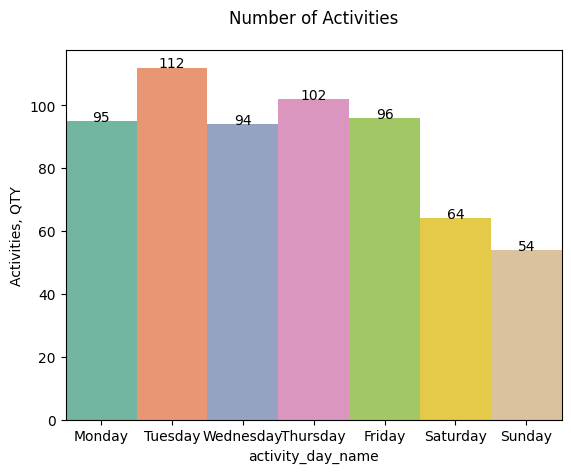

In [28]:
# Define the desired order of weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Perform the groupby and get counts of activity_day_name for each weekday
day_name_counts = df["activity_day_name"].value_counts().reindex(weekday_order)


# activity categories
g = sns.countplot(x='activity_day_name', data=df, palette="Set2",order=day_name_counts.index, width=1)

g.set_title('Number of Activities', y=1.05)
g.set(ylabel='Activities, QTY')

# Merge the groupby result with the countplot data
for i, bar in enumerate(g.patches):
    g.text(
        bar.get_x() + bar.get_width() / 2,     # X position of the text
        bar.get_height() + 0,                   # Y position of the text
        # (str(grouped[i])+" km"),            # Text to be displayed (sum value)
        f'{day_name_counts[day_name_counts.index[i]]}',  # Text to be displayed (count and sum value)
        ha='center',                             # Horizontal alignment
    )

# Display the plot
plt.show()


2. MAIN ACTIVITY - RIDE


In [29]:
# Filter 'Activity Type' == 'Ride'
df_rides = df[df['Activity Type'] == 'Ride']
df_rides["Distance"].sum()

13655.15

In [30]:
df_rides.head()

Activity ID            Activity Date   
3342   6463285994  Jan 2, 2022, 7:39:38 PM  \
3343   6464456622  Jan 3, 2022, 5:12:10 AM   
3344   6466969824  Jan 3, 2022, 3:34:40 PM   
3345   6469567160  Jan 4, 2022, 5:09:06 AM   
3346   6471805022  Jan 4, 2022, 3:18:52 PM   

                                          Activity Name Activity Type   
3342                      Get to da chaaaaappaaaaahhhh!          Ride  \
3343  I am running away from my responsibilities. An...          Ride   
3344  Some people have no idea what they're doing, a...          Ride   
3345  The day you stop racing, is the day you win th...          Ride   
3346                               To the winch, wench!          Ride   

                                   Activity Description  Elapsed Time   
3342  Activity name auto generated by https://www.Ba...          3692  \
3343  https://www.Bandok.com - Give your activities ...          1918   
3344  https://www.Bandok.com - Give your activities ...          3080   
3345  https://www.Bandok.com - Give your activities ...          1950   
3346  https://www.Bandok.com - Give your activities ...          2082   

      Distance  Max Heart Rate  Relative Effort Commute   
3342     20.99             NaN              NaN   False  \
3343     10.24             NaN              NaN   False   
3344     10.61             NaN              NaN   False   
3345      9.46             NaN              NaN   False   
3346     10.78             NaN              NaN   False   

                     Activity Gear                      Filename   
3342             Canyon Inflite Al  activities/6871992476.fit.gz  \
3343  Canyon Grand Canyon 6.0 2018  activities/6873256215.fit.gz   
3344  Canyon Grand Canyon 6.0 2018  activities/6875961489.fit.gz   
3345  Canyon Grand Canyon 6.0 2018  activities/6878729766.fit.gz   
3346  Canyon Grand Canyon 6.0 2018  activities/6881153023.fit.gz   

      Athlete Weight  Bike Weight  Elapsed Time.1  Moving Time    Distance.1   
3342             NaN         10.0          3692.0       3153.0  20997.990234  \
3343             NaN         10.0          1918.0       1918.0  10248.910156   
3344             NaN         10.0          3080.0       2362.0  10615.440430   
3345             NaN         10.0          1950.0       1713.0   9464.620117   
3346             NaN         10.0          2082.0       2017.0  10782.900391   

      Max Speed  Average Speed  Elevation Gain  Elevation Loss  Elevation Low   
3342  10.278028       6.659686            76.0            67.0      -4.400000  \
3343   7.964386       5.343540            31.0            22.0      50.599998   
3344   7.631673       4.494259            32.0            32.0       9.800000   
3345   9.262234       5.525172            36.0            29.0      22.000000   
3346   8.870002       5.346009            25.0            23.0       8.400000   

      Elevation High  Max Grade  Average Grade  Max Cadence  Average Cadence   
3342       33.000000   7.894453       0.060006          NaN              NaN  \
3343      147.600006   3.743648       0.078057          NaN              NaN   
3344      115.000000  14.218155      -0.039565          NaN              NaN   
3345       83.599998  23.230223       0.031697          NaN              NaN   
3346       99.199997  37.698254      -0.020403          NaN              NaN   

      Max Heart Rate.1  Average Heart Rate  Average Watts    Calories   
3342               NaN                 NaN     122.832634  431.831085  \
3343               NaN                 NaN     184.156799  390.000000   
3344               NaN                 NaN     135.194229  370.000000   
3345               NaN                 NaN     197.504089  395.000000   
3346               NaN                 NaN     177.334366  422.000000   

      Average Temperature  Relative Effort.1  Perceived Exertion   
3342                  4.0                NaN                 NaN  \
3343                  6.0                NaN                 Na

In [31]:
df_rides['Filename'].unique()

array(['activities/6871992476.fit.gz', 'activities/6873256215.fit.gz',
       'activities/6875961489.fit.gz', 'activities/6878729766.fit.gz',
       'activities/6881153023.fit.gz', 'activities/6882748668.fit.gz',
       'activities/6884274936.fit.gz', 'activities/6886741947.fit.gz',
       'activities/6889540325.fit.gz', 'activities/6892258580.fit.gz',
       'activities/6898491349.fit.gz', 'activities/6900459485.fit.gz',
       'activities/6904297640.fit.gz', 'activities/6911304046.fit.gz',
       'activities/6913623010.fit.gz', 'activities/6914484687.fit.gz',
       'activities/6916455675.fit.gz', 'activities/6918959222.fit.gz',
       'activities/6920012704.fit.gz', 'activities/6922129805.fit.gz',
       'activities/6924603694.fit.gz', 'activities/6927673876.fit.gz',
       'activities/6930060846.fit.gz', 'activities/6933068932.fit.gz',
       'activities/6935551472.fit.gz', 'activities/6941983233.fit.gz',
       'activities/6950244207.fit.gz', 'activities/6952377911.fit.gz',
      

In [32]:
df_rides['Activity Type'].count()

553

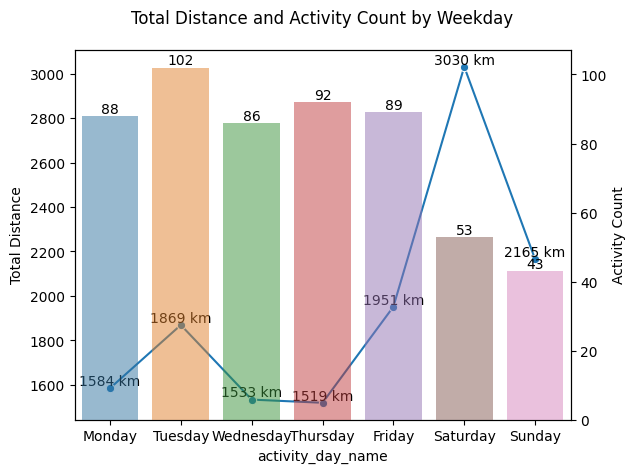

In [33]:
# Define the desired order of weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Perform the groupby and get counts of activity_day_name for each weekday
day_name_counts = df_rides["activity_day_name"].value_counts().reindex(weekday_order)

# Perform the groupby and get sums of Distance for each weekday
day_name_sum = df_rides.groupby("activity_day_name")["Distance"].sum().reindex(weekday_order)

# Create the line plot
fig, ax1 = plt.subplots()
ax1.set_title('Total Distance and Activity Count by Weekday', y=1.05)
ax1.set_ylabel('Total Distance')

lineplot = sns.lineplot(x=day_name_sum.index, y=day_name_sum.values, marker="o", ax=ax1)

# Annotate line plot with sum values
for x, y in zip(day_name_sum.index, day_name_sum.values):
    lineplot.text(x, y, f'{int(y)} km', ha='center', va='bottom')

# Create the bar plot on the second axis
ax2 = ax1.twinx()
barplot = sns.barplot(x=day_name_counts.index, y=day_name_counts.values, ax=ax2, alpha=0.5)

ax2.set_ylabel('Activity Count')

# Annotate bar plot with count values
for x, y in zip(range(len(day_name_counts)), day_name_counts.values):
    barplot.text(x, y, str(y), ha='center', va='bottom')

# Display the plot
plt.show()


In [34]:
# longest distance activity based on activity type
df_rides['Distance'].max()

307.48

In [35]:
df_rides['Distance'].idxmax()

3626

Bandók

Bandók is a collection of kick-ass apps built on top of Strava. Bandok provides an app for generating clever ride names to replace the boring defaults like “Morning Ride” and an app for challenging yourself to virtual ultra-endurance cycling events.

In [36]:
# Bandók is a collection of kick-ass apps built on top of Strava. 
# Bandok provides an app for generating clever ride names to replace the boring defaults like “Morning Ride” and an app for challenging yourself to virtual ultra-endurance cycling events
df_rides['Activity Name'].head().unique()

array(['Get to da chaaaaappaaaaahhhh!',
       'I am running away from my responsibilities. And it feels good.',
       "Some people have no idea what they're doing, and a lot of them are really good at it.",
       'The day you stop racing, is the day you win the race.',
       'To the winch, wench!'], dtype=object)

In [37]:
# Elevation

elevation = df_rides[['Activity Date', 'Activity Name', 'Distance', 'moving_time', 'average_speed', 'max_speed', 'elevation_gain','Elevation Gain']].sort_values(by=['Elevation Gain'], ascending=False)
elevation.head(10)

Activity Date   
3626   Jun 11, 2022, 5:04:09 AM  \
3530   Apr 17, 2022, 4:37:45 AM   
3585  Apr 26, 2022, 12:00:00 AM   
3588   May 21, 2022, 5:08:05 AM   
3828   Sep 25, 2022, 8:47:31 AM   
3778   Aug 28, 2022, 5:25:20 AM   
3666   Jul 2, 2022, 10:55:24 AM   
3708   Jul 25, 2022, 7:54:27 AM   
3646   Jun 22, 2022, 3:05:29 PM   
3714   Jul 30, 2022, 2:49:52 PM   

                                          Activity Name  Distance   
3626  I'd Give You A Hug, But My Shirt Smells Pretty...    307.48  \
3530                                              OTHER    170.87   
3585  It is not enough to have talent.  You must als...    197.23   
3588  Sometimes you gotta do a little bad to make good.    201.86   
3828                Tonight I'm gonna rock you tonight.    146.06   
3778  Taking off faster than a toupee in a fan factory.    147.10   
3666                   OK, so what's the speed of dark?    153.73   
3708              The gang's all here.  Where were you?    111.34   
3646     Ohh, they have the internet on computers now!?    104.66   
3714          Donuts - Is there anything they can't do?    110.29   

                             moving_time average_speed max_speed   
3626  12 hours, 5 minutes and 25 seconds         25.43     63.84  \
3530  8 hours, 28 minutes and 56 seconds         20.14     69.13   
3585  9 hours, 51 minutes and 50 seconds          20.0     23.89   
3588  7 hours, 13 minutes and 48 seconds         27.92     63.21   
3828  6 hours, 25 minutes and 47 seconds         22.72     62.69   
3778  5 hours, 38 minutes and 57 seconds         26.04     47.05   
3666  5 hours, 37 minutes and 34 seconds         27.32     62.49   
3708   4 hours, 7 minutes and 57 seconds         26.94     52.25   
3646   4 hours, 2 minutes and 43 seconds         25.87     64.79   
3714  4 hours, 17 minutes and 17 seconds         25.72     52.91   

      elevation_gain  Elevation Gain  
3626          1422.0     1422.000000  
3530          1139.0     1139.000000  
3585           964.6      964.603333  
3588           905.0      905.000000  
3828           750.0      750.000000  
3778           649.0      649.000000  
3666           607.0      607.000000  
3708           594.0      594.000000  
3646           581.0      581.000000  
3714           541.0      541.000000

In [38]:
df_rides=df[df['Activity Type']=='Ride']

[Text(0.5, 0, 'Rides'), Text(0, 0.5, 'Distance (km)')]

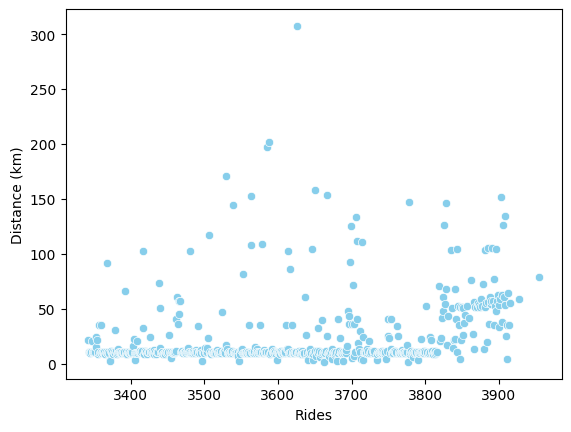

In [39]:
# Rides by Distance
g = sns.scatterplot(x=df_rides.index, y='Distance', data=df_rides, color="skyblue")
g.set(xlabel='Rides', ylabel='Distance (km)')

In [40]:
df_rides_longest=df_rides.sort_values(by=['Distance'], ascending=False)[['Activity Date', 'Activity Name', 'Activity Description', 'Distance', 'Media', 'elevation_gain', 'moving_time','Filename']].head(10)

In [41]:
df_rides_longest

Activity Date   
3626   Jun 11, 2022, 5:04:09 AM  \
3588   May 21, 2022, 5:08:05 AM   
3585  Apr 26, 2022, 12:00:00 AM   
3530   Apr 17, 2022, 4:37:45 AM   
3651   Jun 25, 2022, 5:58:06 AM   
3666   Jul 2, 2022, 10:55:24 AM   
3564    May 8, 2022, 4:51:48 AM   
3903   Nov 10, 2022, 3:01:55 PM   
3778   Aug 28, 2022, 5:25:20 AM   
3828   Sep 25, 2022, 8:47:31 AM   

                                          Activity Name   
3626  I'd Give You A Hug, But My Shirt Smells Pretty...  \
3588  Sometimes you gotta do a little bad to make good.   
3585  It is not enough to have talent.  You must als...   
3530                                              OTHER   
3651                                     Hold the door!   
3666                   OK, so what's the speed of dark?   
3564  Don't move. Gonorrhea can't see us if we don't...   
3903  Is there like, a Texas Chainsaw movie being fi...   
3778  Taking off faster than a toupee in a fan factory.   
3828                Tonight I'm gonna rock you tonight.   

                                   Activity Description  Distance   
3626  Activity name auto generated by https://www.Ba...    307.48  \
3588  Brevetas 200　\n👏 147.3 new kilometers\n🏘 Compl...    201.86   
3585  https://www.Bandok.com - Give your activities ...    197.23   
3530  　\n👏 104.11 new kilometers\n🏘 Completed 25% of...    170.87   
3651  https://www.Bandok.com - Give your activities ...    157.69   
3666  Activity name auto generated by https://www.Ba...    153.73   
3564  Activity name auto generated by https://www.Ba...    152.87   
3903  Activity name auto generated by https://www.Ba...    151.54   
3778  https://www.Bandok.com - Give your activities ...    147.10   
3828  Activity name auto generated by https://www.Ba...    146.06   

                                                  Media  elevation_gain   
3626  media/0c34c96c-ad77-4fbb-ae54-31a15efd9088.jpg...          1422.0  \
3588  media/f5ec7708-f941-4aa2-987e-4997809365da.jpg...           905.0   
3585                                                NaN           964.6   
3530  media/0754d19a-a20f-4b7d-8228-15dcc6875081.jpg...          1139.0   
3651     media/8ab8756d-3556-4cd0-9f63-ee0ae39d4424.jpg           508.0   
3666  media/c2e6585c-62c7-42c3-988c-cf3ccaf3fdc9.jpg...           607.0   
3564  media/e1a974ce-da20-4b5f-9ea3-e7af2efdd028.jpg...           493.0   
3903  media/cdc88c82-1ea5-44e7-8269-05dfca43dce2.jpg...           402.0   
3778  media/14fc408e-9137-4fd2-ac52-d3651dde1b12.jpg...           649.0   
3828  media/1177e9a5-2500-43cd-9792-ca43b33f898b.jpg...           750.0   

                             moving_time                      Filename  
3626  12 hours, 5 minutes and 25 seconds  activities/7769034226.fit.gz  
3588  7 hours, 13 minutes and 48 seconds  activities/7649503917.fit.gz  
3585  9 hours, 51 minutes and 50 seconds  activities/7635573754.gpx.gz  
3530  8 hours, 28 minutes and 56 seconds  activities/7448452247.fit.gz  
3651  4 hours, 58 minutes and 38 seconds  activities/7848725317.fit.gz  
3666  5 hours, 37 minutes and 34 seconds  activities/7891527046.fit.gz  
3564  6 hours, 45 minutes and 14 seconds  activities/7569592258.fit.gz  
3903  5 hours, 52 minutes and 28 seconds  activities/8670641405.fit.gz  
3778  5 hours, 38 minutes and 57 seconds  activities/8236243018.fit.gz  
3828  6 hours, 25 minutes and 47 seconds  activities/8407579212.fit.gz

In [147]:
df_rides_longest.loc[3585, 'Filename']


'activities/7635573754.gpx.gz'

In [184]:
def read_file(file_path):
    _, file_extension = os.path.splitext(file_path)
    if file_extension.lower() == '.gz':
        with gzip.open(file_path, 'rb') as f:
            file_data = f.read()
    else:
        with open(file_path, 'rb') as f:
            try:
                file_data = f.read().decode('utf-8')
            except UnicodeDecodeError:
                file_data = f.read().decode('latin-1')
    return file_data   
    
    
def process_fit(file_data):
    coords = []
    fitfile = fitparse.FitFile(file_data)
    for record in fitfile.get_messages('record'):
        if record.get_value('position_lat') and record.get_value('position_long'):
            lat = record.get_value('position_lat')*(180/2**31)
            lon = record.get_value('position_long')*(180/2**31)
            coords.append((lat, lon))
    return coords
    
    
def process_gpx(file_data):
    gpx = gpxpy.parse(file_data)
    coords = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                coords.append((point.latitude, point.longitude))
    return coords


for i in df_rides_longest.index:
    media_string = df_rides_longest.loc[i, 'Media']
    if not isinstance(media_string, str):
        image_paths = []
    else:
        image_paths = media_string.split('|')
    activity_date = df_rides_longest.loc[i, 'Activity Date']
    activity_name = df_rides_longest.loc[i, 'Activity Name']
    activity_description = df_rides_longest.loc[i, 'Activity Description']
    distance = df_rides_longest.loc[i, 'Distance']

    show_html = f'<h3>{i} "{activity_name}" Distance: {distance} km</h3>'
    show_html += f'<p>Activity Description: {activity_description}</p>'
    show_html += f'<p>Activity Date: {activity_date}</p>'
    
    if len(image_paths) > 0:
        for path in image_paths:
            show_html += f'<a href="{path}" target="_blank"><img src="{path}" style="width:150px; margin:10px;"></a>'
    else:
        show_html += '<p>No images available.</p>'

    display(HTML(show_html))
    

    
    
    
    file_path=df_rides_longest.loc[i, 'Filename']
    file_data = read_file(file_path)

    # Process the file based on its extension
    
    if file_extension.lower() == '.gz':
        # Process .gz file (GPX or FIT)
        try:
            # Try processing as fit
            
            coords = process_fit(file_data)
        except:
            # If GPX parsing fails, try processing as FIT
            coords = process_gpx(file_data)
    elif file_extension.lower() == '.gpx':
        # Process .gpx file
        coords = process_gpx(file_data)
    elif file_extension.lower() == '.fit':
        # Process .fit file
        coords = process_fit(file_data)
    else:
        print(f"Unsupported file format: {file_extension}")
        continue
   
        
            

     # Create a map centered around the first coordinate in the route
    print(coords[0])
    center = len(coords)//4
    map_center = coords[center]
    m = folium.Map(location=map_center, zoom_start=9)

    # Add a PolyLine to the map using the coordinates
    folium.PolyLine(coords, color="blue", weight=2.5, opacity=1).add_to(m)

    # Display the map
    display(m)
    


(54.637054949998856, 24.93920817039907)


(54.63734244927764, 24.939193166792393)


(54.635733, 24.9382)


(55.71224978193641, 21.126060476526618)


(55.71854693815112, 21.127161271870136)


(55.71266720071435, 21.12802200950682)


(55.72101591154933, 21.13528057001531)


(55.71198365651071, 21.127066304907203)


(55.71227199397981, 21.126009514555335)


(55.71126733906567, 21.13045234233141)


file_path=df_rides_longest.loc[3626, 'Filename']

_, file_extension = os.path.splitext(file_path)
if file_extension.lower() == '.gz':
    with gzip.open(file_path, 'rb') as f:
        file_data = f.read()
        
        coords = []
        fitfile = fitparse.FitFile(file_data)
        # print(type(fitfile))
        for record in fitfile.get_messages('record'):
            # print(record.get_value('position_long'))
            if record.get_value('position_lat') and record.get_value('position_long'):
                lat = record.get_value('position_lat')*(180/2**31)
                lon = record.get_value('position_long')*(180/2**31)
                coords.append((lat, lon))
# print(coords)
 # Create a map centered around the first coordinate in the route
print(coords[0])
center = len(coords)//4
map_center = coords[center]
m = folium.Map(location=map_center, zoom_start=9)

# Add a PolyLine to the map using the coordinates
folium.PolyLine(coords, color="blue", weight=2.5, opacity=1).add_to(m)

# Display the map
# display(m)

file_path=df_rides_longest.loc[3585, 'Filename']

_, file_extension = os.path.splitext(file_path)
if file_extension.lower() == '.gz':
        with gzip.open(file_path, 'rb') as f:
            file_data = f.read()
            
else:
    with open(file_path, 'rb') as f:
        file_data = f.read()
    
                    
            

gpx = gpxpy.parse(file_data)
print(type(gpx))
coords = []
for track in gpx.tracks:
    print(type(track))
    for segment in track.segments:
        print(type(segment))
        for point in segment.points:
            # print(point)
            coords.append((point.latitude, point.longitude))
# print(coords)
    
center = len(coords)//4
map_center = coords[center]
m = folium.Map(location=map_center, zoom_start=9)

# Add a PolyLine to the map using the coordinates
folium.PolyLine(coords, color="blue", weight=2.5, opacity=1).add_to(m)
display(m)


    
